In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
#Importing data to work with
segment_df = pd.read_excel("nvidia_revenue.xlsx",sheet_name="segment")
geo_df = pd.read_excel("nvidia_revenue.xlsx",sheet_name="geographical")
market_df = pd.read_excel("nvidia_revenue.xlsx",sheet_name="markets")

In [26]:
segment_df

,Unnamed: 0,2020,2021,2022
0,Graphics,7639,9834,15868
1,Computing & Networking,3279,6841,11046


In [29]:
?pd.melt

In [31]:
segment_df = pd.melt(segment_df, value_vars=[2020, 2021,2022],id_vars=['Unnamed: 0'],value_name="Amount",var_name="Year")

,Unnamed: 0,Year,Amount
0,Graphics,2020,7639
1,Computing & Networking,2020,3279
2,Graphics,2021,9834
3,Computing & Networking,2021,6841
4,Graphics,2022,15868
5,Computing & Networking,2022,11046


In [33]:
segment_df=segment_df.rename(columns={"Unnamed: 0":"Segments"})
segment_df

,Segments,Year,Amount
0,Graphics,2020,7639
1,Computing & Networking,2020,3279
2,Graphics,2021,9834
3,Computing & Networking,2021,6841
4,Graphics,2022,15868
5,Computing & Networking,2022,11046


In [38]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

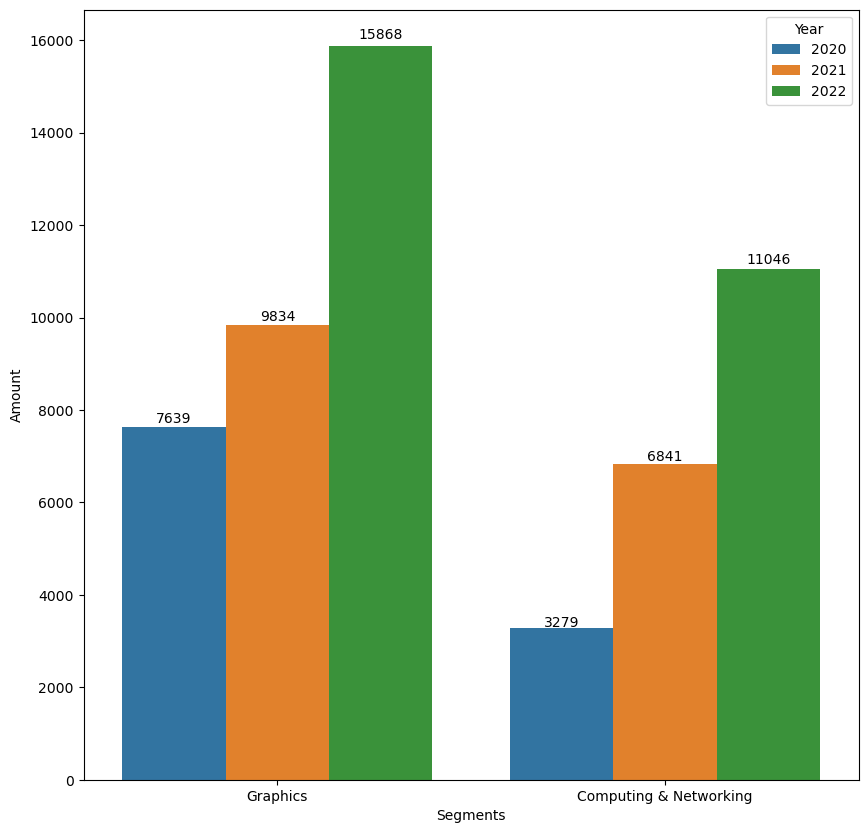

In [39]:
plt.figure(figsize=[10,10])
d = sns.barplot(data=segment_df,x="Segments",y="Amount",hue="Year")
show_values(d)

In [40]:
market_df = pd.melt(market_df, value_vars=[2020, 2021,2022],id_vars=['Unnamed: 0'],value_name="Amount",var_name="Year")
market_df=market_df.rename(columns={"Unnamed: 0":"Markets"})
market_df

,Markets,Year,Amount
0,Gaming,2020,5518
1,Data Center,2020,2983
2,Professional Visualization,2020,1212
3,Automotive,2020,700
4,OEM & Other,2020,505
5,Gaming,2021,7759
6,Data Center,2021,6696
7,Professional Visualization,2021,1053
8,Automotive,2021,536
9,OEM & Other,2021,631


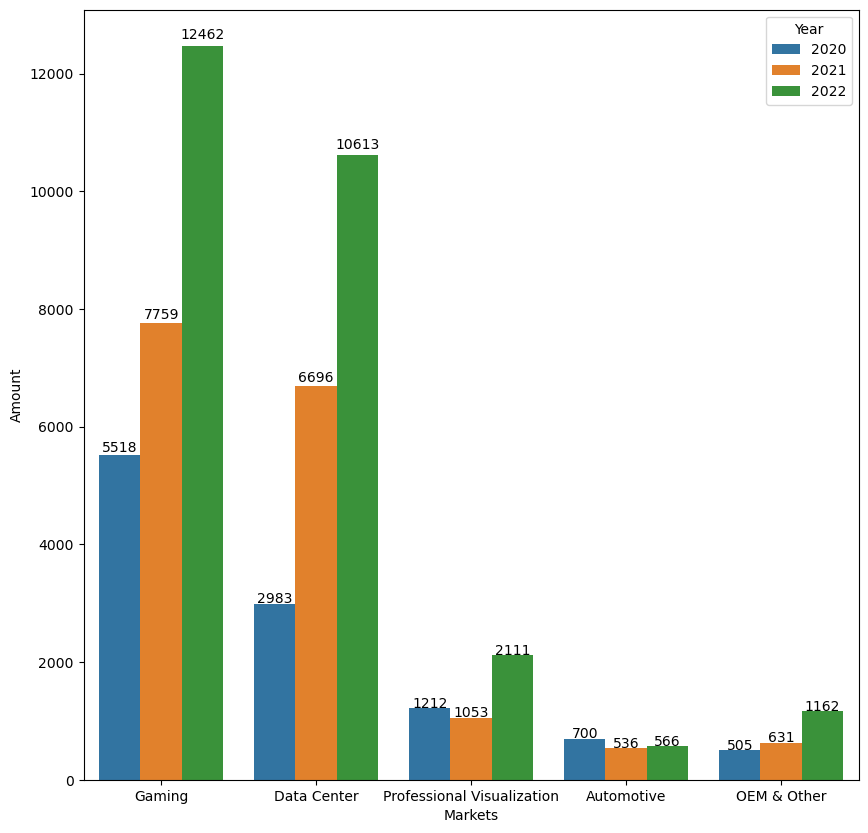

In [41]:
plt.figure(figsize=[10,10])
p = sns.barplot(data=market_df,x="Markets",y="Amount",hue="Year")
show_values(p)

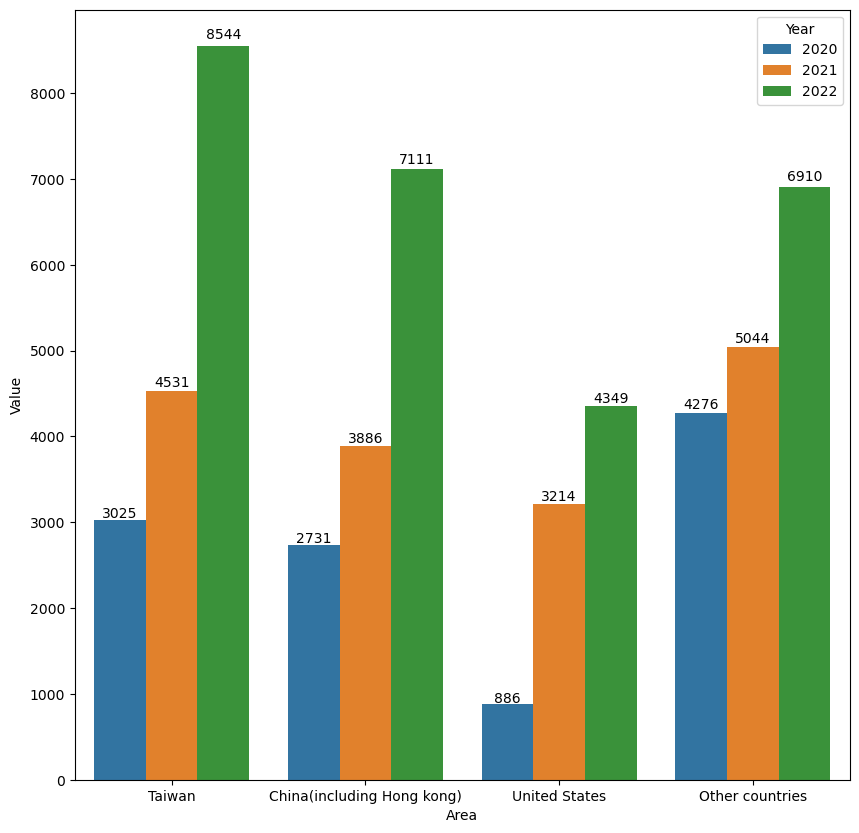

In [42]:
plt.figure(figsize=[10,10])
q = sns.barplot(data=geo_df,x="Area",y="Value",hue="Year")
show_values(q)

In [44]:
historical_df = pd.read_excel("nvidia_revenue.xlsx",sheet_name="historical")
historical_df

,Year,Amount
0,2022,26914
1,2021,16675
2,2020,10918
3,2019,11716
4,2018,9714
5,2017,6910
6,2016,5010
7,2015,4682
8,2014,4130
9,2013,4280


In [79]:
historical_df["Amount"] = historical_df["Amount"]/1000
historical_df

,Year,Amount
0,2022,26.914
1,2021,16.675
2,2020,10.918
3,2019,11.716
4,2018,9.714
5,2017,6.910
6,2016,5.010
7,2015,4.682
8,2014,4.130
9,2013,4.280


In [54]:
taiwan_df = pd.read_excel("Taiwan_gdp.xls")
taiwan_df

,"GDP, current prices (Billions of U.S. dollars)",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Taiwan Province of China,42.285,48.969,49.535,54.148,61.071,63.617,78.195,105.039,126.473,...,609.198,611.396,669.25,774.728,828.659,858.972,901.616,948.513,996.821,1045.227


In [56]:
taiwan_df = taiwan_df.drop(0)

In [58]:
taiwan_df = taiwan_df.T

In [60]:
header = taiwan_df.iloc[0]
taiwan_df = taiwan_df[1:]
taiwan_df.columns = header
taiwan_df

"GDP, current prices (Billions of U.S. dollars)",Taiwan Province of China
1980,42.285
1981,48.969
1982,49.535
1983,54.148
1984,61.071
1985,63.617
1986,78.195
1987,105.039
1988,126.473
1989,152.704


In [68]:
#taiwan_df = taiwan_df.reset_index(names="Year")
taiwan_df.rename(columns={"Taiwan Province of China":"Taiwan GDP"},inplace=True)


In [75]:
taiwan_df.rename_axis("",axis="columns",inplace=True)

In [76]:
taiwan_df

,Year,Taiwan GDP
0,1980,42.285
1,1981,48.969
2,1982,49.535
3,1983,54.148
4,1984,61.071
5,1985,63.617
6,1986,78.195
7,1987,105.039
8,1988,126.473
9,1989,152.704


In [81]:
corr_df = taiwan_df.set_index("Year").join(historical_df.set_index("Year"),how="right")

In [82]:
corr_df

,Taiwan GDP,Amount
Year,,
2022,828.659,26.914
2021,774.728,16.675
2020,669.25,10.918
2019,611.396,11.716
2018,609.198,9.714
2017,590.733,6.910
2016,543.081,5.010
2015,534.515,4.682
2014,535.328,4.130


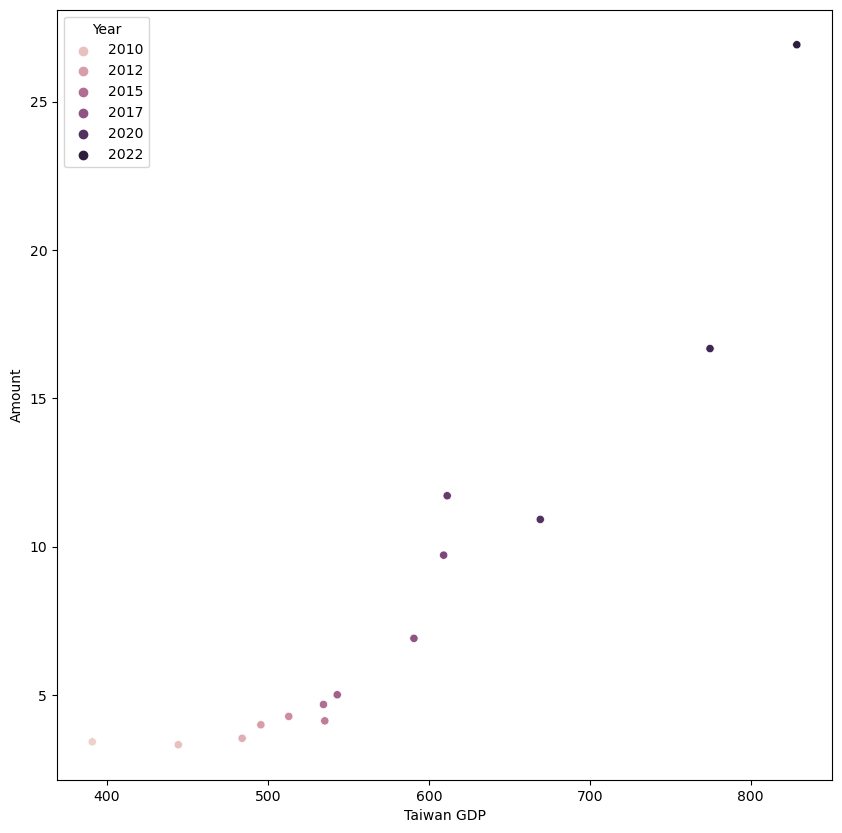

In [84]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=corr_df,y="Amount",x="Taiwan GDP",hue="Year")
plt.show()

In [86]:
gdp_df = pd.read_csv("GDP_growth.csv",skip_blank_lines=True,
                     skiprows=4)
gdp_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,6.429817,-0.020479,3.543630,2.116716,5.482371,5.257856,0.635029,-18.589100,17.172509,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,0.237304,7.984460,5.163873,4.583677,5.328044,...,4.221358,3.990637,2.976421,2.224016,2.546020,2.510797,2.078473,-2.900490,4.293395,NaN
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.737146,NaN
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.835056,3.772898,7.282985,5.392705,4.056588,...,6.108758,5.930450,2.745137,0.113687,2.305623,2.946175,3.190879,-0.900382,3.965399,NaN
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.950000,4.820000,0.940000,-2.580000,-0.150000,-1.316312,-0.700000,-5.600000,1.100000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.340908,3.348804,5.916270,5.571757,4.825690,3.406631,4.756831,-5.340275,10.745612,NaN
262,"Yemen, Rep.",YEM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.823519,-0.188690,-27.994546,-9.375124,-5.071796,0.752448,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,3.844734,6.177931,7.373709,7.939609,6.122798,...,2.485468,1.413826,1.321862,0.664552,1.157947,1.522329,0.303453,-6.342471,4.913097,NaN
264,Zambia,ZMB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.361382,-2.490839,3.272393,12.214048,16.647456,...,5.057232,4.697992,2.920375,3.776679,3.504336,4.034494,1.441306,-2.785055,4.598734,NaN


In [90]:
gdp_df = gdp_df.drop(columns=["Unnamed: 66"]).T.drop(["Indicator Name","Indicator Code"])
header = gdp_df.iloc[0]
gdp_df = gdp_df[1:]
gdp_df.columns = header
gdp_df

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Country Code,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,0.237304,NaN,1.835056,NaN,NaN,NaN,NaN,NaN,5.427843,...,NaN,NaN,NaN,3.789979,NaN,NaN,NaN,3.844734,1.361382,6.316157
1962,NaN,7.98446,NaN,3.772898,NaN,NaN,NaN,NaN,NaN,-0.852022,...,NaN,NaN,NaN,5.316037,NaN,NaN,NaN,6.177931,-2.490839,1.434471
1963,NaN,5.163873,NaN,7.282985,NaN,NaN,NaN,NaN,NaN,-5.308197,...,NaN,NaN,NaN,5.185396,NaN,NaN,NaN,7.373709,3.272393,6.244345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,5.482371,2.54602,2.647003,2.305623,-0.15,3.802227,0.346072,1.056333,0.735069,2.818503,...,-0.735294,6.940188,6.317305,3.384964,1.406282,4.82569,-5.071796,1.157947,3.504336,4.080264
2018,5.257856,2.510797,1.189228,2.946175,-1.316312,4.01936,1.588765,2.383925,1.313914,-2.617396,...,1.904762,7.464991,2.90023,3.285537,-0.609647,3.406631,0.752448,1.522329,4.034494,5.009867
2019,0.635029,2.078473,3.911603,3.190879,-0.7,2.088063,2.015548,1.256279,1.108348,-2.000861,...,2.777778,7.359281,3.241188,2.59129,4.451859,4.756831,NaN,0.303453,1.441306,-6.332446
2020,-18.5891,-2.90049,-2.351101,-0.900382,-5.6,-3.48163,-11.18394,-4.844774,-4.957052,-9.943235,...,-2.147007,2.865412,-5.396254,-3.115404,-3.108444,-5.340275,NaN,-6.342471,-2.785055,-7.816951


In [98]:
gdp_df_clean = gdp_df.rename_axis(" ",axis="columns").drop("Country Code").rename_axis("Year")

In [99]:
gdp_df_clean

,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,0.237304,NaN,1.835056,NaN,NaN,NaN,NaN,NaN,5.427843,...,NaN,NaN,NaN,3.789979,NaN,NaN,NaN,3.844734,1.361382,6.316157
1962,NaN,7.98446,NaN,3.772898,NaN,NaN,NaN,NaN,NaN,-0.852022,...,NaN,NaN,NaN,5.316037,NaN,NaN,NaN,6.177931,-2.490839,1.434471
1963,NaN,5.163873,NaN,7.282985,NaN,NaN,NaN,NaN,NaN,-5.308197,...,NaN,NaN,NaN,5.185396,NaN,NaN,NaN,7.373709,3.272393,6.244345
1964,NaN,4.583677,NaN,5.392705,NaN,NaN,NaN,NaN,NaN,10.130298,...,NaN,NaN,NaN,6.558285,NaN,NaN,NaN,7.939609,12.214048,-1.106172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,5.482371,2.54602,2.647003,2.305623,-0.15,3.802227,0.346072,1.056333,0.735069,2.818503,...,-0.735294,6.940188,6.317305,3.384964,1.406282,4.82569,-5.071796,1.157947,3.504336,4.080264
2018,5.257856,2.510797,1.189228,2.946175,-1.316312,4.01936,1.588765,2.383925,1.313914,-2.617396,...,1.904762,7.464991,2.90023,3.285537,-0.609647,3.406631,0.752448,1.522329,4.034494,5.009867
2019,0.635029,2.078473,3.911603,3.190879,-0.7,2.088063,2.015548,1.256279,1.108348,-2.000861,...,2.777778,7.359281,3.241188,2.59129,4.451859,4.756831,NaN,0.303453,1.441306,-6.332446


In [106]:
us_df = gdp_df_clean.loc[:,"United States"].to_frame()

In [112]:
us_dd = us_df.reset_index()

In [117]:
us_dd["Year"] = pd.to_numeric(us_dd["Year"])

In [126]:
historical_df["pct_change"] = ((historical_df["Amount"]/historical_df["Amount"].shift(-1))-1)*100

In [127]:
historical_df

,Year,Amount,pct_change
0,2022,26.914,61.403298
1,2021,16.675,52.729438
2,2020,10.918,-6.811198
3,2019,11.716,20.609430
4,2018,9.714,40.578871
5,2017,6.910,37.924152
6,2016,5.010,7.005553
7,2015,4.682,13.365617
8,2014,4.130,-3.504673
9,2013,4.280,7.053527


In [128]:
corr1_df = us_dd.set_index("Year").join(historical_df.set_index("Year"),how="inner")
corr1_df

,United States,Amount,pct_change
Year,,,
2009,-2.599888,3.425,NaN
2010,2.708857,3.326,-2.890511
2011,1.549895,3.543,6.524354
2012,2.280688,3.998,12.842224
2013,1.841875,4.280,7.053527
2014,2.287776,4.130,-3.504673
2015,2.70637,4.682,13.365617
2016,1.667472,5.010,7.005553
2017,2.241921,6.910,37.924152


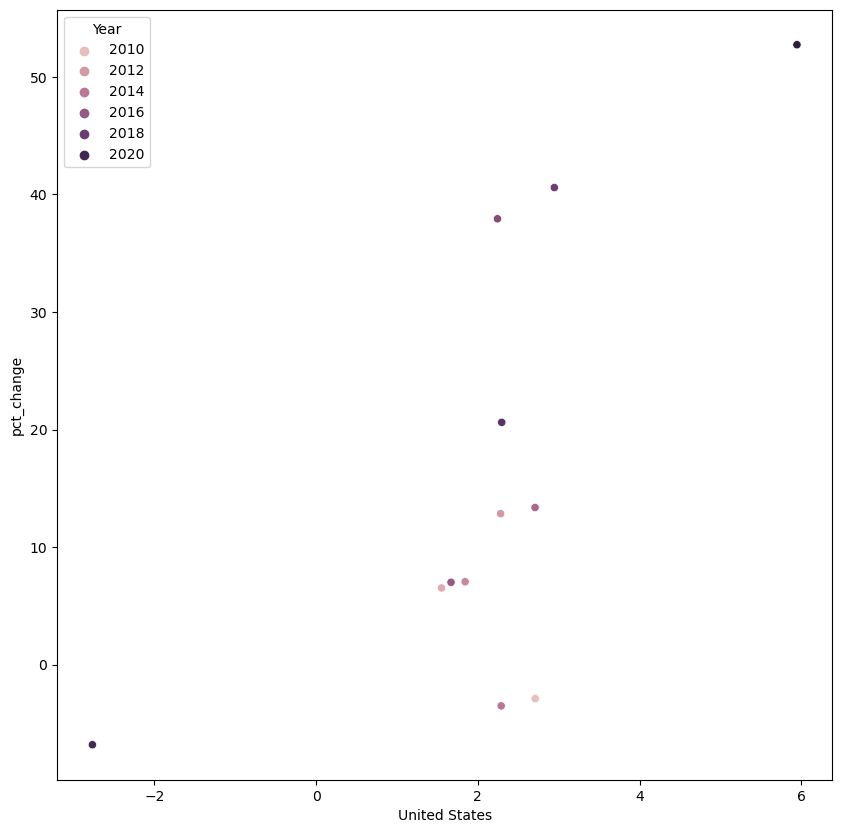

In [129]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=corr1_df,y="pct_change",x="United States",hue="Year")
plt.show()